# FUNCTIONS

In [ ]:
# !git clone https://github.com/Line233/one.git ./one
# !mv ./one/tool.py ./

In [ ]:
import torch
import random
import torchvision
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import torch.utils.data as data
import torch.nn as nn
import tool
%matplotlib inline
import importlib
importlib.reload(tool)

In [ ]:
class mnist_data(data.Dataset):
    def __init__(self,x,y):
        self.x=x.float()
        self.y=y.long()
    def __len__(self):
        return len(self.x)
    def __getitem__(self,index):
        if self.y is not None:
            return self.x[index].reshape([-1]),self.y[index].long()
        else:
            return self.x[index].reshape([-1])

In [ ]:
class mnist_single(nn.Module):
    def __init__(self,input_a,hidden_a,device=torch.device('cpu'),rand_seed=10):
        super(mnist_single,self).__init__()
        torch.manual_seed(rand_seed)
        self.device=device
        self.hidden_a=hidden_a
        self.linear1=nn.Linear(input_a,self.hidden_a)
        self.relu=nn.ReLU()
        self.linear2=nn.Linear(self.hidden_a,10)
        self.softmax=nn.Softmax(dim=1)
        self.lossF=nn.CrossEntropyLoss()
    def forward(self,input):
        input=input.to(self.device)
        res=self.linear1(input)
        res=self.relu(res)
        res=self.linear2(res)
        res=self.softmax(res)
        return res
    
    def reset_loss_record(self):
        self.__total_loss__=0.0
        self.__right_num__=0
        self.__total_num__=0
    def computeloss(self,x,y,res):
        y=y.to(self.device)
        loss=self.lossF(res,y)
        self.__total_loss__+=loss.tolist()*len(x)
        a=res.argmax(dim=1)
        self.__right_num__+=torch.eq(a,y).sum().tolist()
        self.__total_num__+=len(x)
        return loss
    def get_loss(self):
        return self.__total_loss__/self.__total_num__,self.__right_num__/self.__total_num__


In [ ]:
class mnist_cov(nn.Module):
    def __init__(self,input_a,input_channel,device=torch.device('cpu'),rand_seed=10):
        super(mnist_cov,self).__init__()
        torch.manual_seed(rand_seed)
        self.device=device
        self.inputa=input_a
        self.input_channel=input_channel

        self.out=nn.Sequential(
            nn.Conv2d(1,4,3,1,1),
            nn.MaxPool2d(3,2),
            nn.Conv2d(4,16,3,1,1),
            nn.MaxPool2d(3,2)
        )
        self.out2=nn.Sequential(
            nn.Linear(16,10),
            nn.Softmax(dim=1)
        )
        self.lossF=nn.CrossEntropyLoss()
        pass
    def forward(self,input):
        input=input.reshape([-1,self.input_channel,self.inputa,self.inputa]).to(self.device)
        res=self.out(input)
        res= res.reshape([-1,16])
        res=self.out2(res)
        return res
    def reset_loss_record(self):
        self.__total_loss__=0.0
        self.__right_num__=0
        self.__total_num__=0
    def computeloss(self,x,y,res):
        y=y.to(self.device)
        loss=self.lossF(res,y)
        self.__total_loss__+=loss.tolist()*len(x)
        a=res.argmax(dim=1)
        self.__right_num__+=torch.eq(a,y).sum().tolist()
        self.__total_num__+=len(x)
        return loss
    def get_loss(self):
        return self.__total_loss__/self.__total_num__,self.__right_num__/self.__total_num__

# DATA

In [ ]:
train_data=torch.load('./data/train_hidden')
valid_data=torch.load('./data/valid_hidden')
test_data=torch.load('./data/test_hidden')

In [ ]:
device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
labels=['train_loss','train_precise','valid_loss','valid_precise']
select_loss=[True,False,True,False]
select_precise=[False,True,False,True]

In [ ]:
simple_data=mnist_data(valid_data[0:100][0].reshape([-1,10,10]),valid_data[0:100][1])

# TRAIN_CONV

In [ ]:
model=mnist_cov(10,1,device).to(device)
record1=[]

In [ ]:
record1+=tool.TrainTool.train_epoch(model,simple_data,valid_data,lr=0.0001,batch_size=1000,epoch=10)

In [ ]:
lc1=tool.learning_curve(record1,reshape=True)
lc1.save('./data/lc_conv')

# TRAIN_SINGLE

In [ ]:
model_single=mnist_single(100,50)

In [275]:
res+=tool.TrainTool.train_epoch(model_single,train_data,valid_data,lr=0.001,batch_size=800,epoch=20)

0	[1.469934986035029, 0.9912239583333333, 1.4915568331877391, 0.9696875]
1	[1.4697869412600995, 0.9913359375, 1.4931304355462391, 0.9680208333333333]
2	[1.4697376874585946, 0.9914140625, 1.4916676382223766, 0.9689583333333334]
3	[1.46945439055562, 0.9916692708333333, 1.4929461081822712, 0.9677083333333333]
4	[1.4692160695791245, 0.9918984375, 1.4929412404696147, 0.9678125]
5	[1.4692183862129846, 0.9919010416666667, 1.4927295943101246, 0.9684375]
6	[1.469221976896127, 0.9919010416666667, 1.4927636881669362, 0.9682291666666667]
7	[1.4692276579638321, 0.9919010416666667, 1.4927686055501301, 0.9682291666666667]
8	[1.469232169042031, 0.9919010416666667, 1.492454320192337, 0.96875]
9	[1.471594763547182, 0.9895520833333333, 1.4925654133160908, 0.9680208333333333]
10	[1.4697031798462072, 0.9914427083333334, 1.489954133828481, 0.9710416666666667]
11	[1.4693393846352896, 0.9917864583333333, 1.491111586491267, 0.9697916666666667]
12	[1.4691623131434122, 0.9919739583333333, 1.4909016788005829, 0.9

In [279]:
lc2=tool.learning_curve(res,labels,reshape=True)

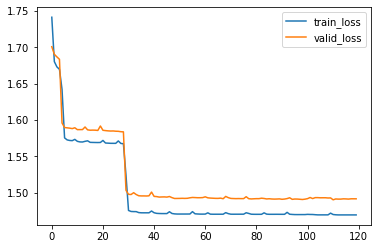

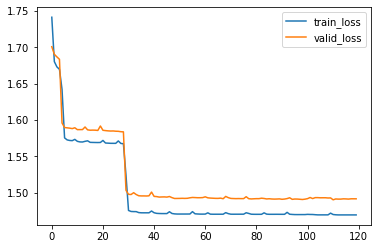

In [280]:
lc2.draw(select=select_loss)